In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_excel('Election_Data.xlsx', sheet_name=1)
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.2+ KB


In [32]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [33]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [34]:
df.shape

(1525, 10)

In [35]:
## There are no null values in the dataset
## Median age of voters is 53
## Median value of economic.cond.national and economic.cond.household is 3
## Mean value of economic.cond.national and economic.cond.household is above 3 which indicates majority of people fall in to 
##   middle class income range.
## Mean value of blair is more than that of Hague median values are same for both blair and hague
## Mean value of eurosceptic sentiment is more than 6 with high standard deviation which indicates values are not close to 
   ## the mean 
## Majority of the people have average political knowledge

### Exploratory data analysis

#### Univariate analysis

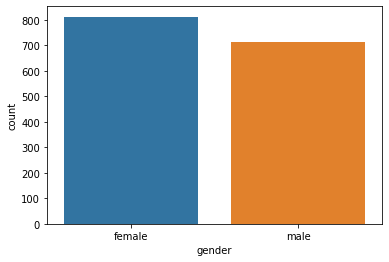

In [36]:
sns.countplot(df['gender']);

There are more number of female votes than male voters

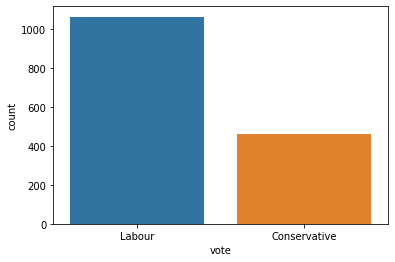

In [37]:
sns.countplot(df['vote']);

In [38]:
## More number of voters are in favour of labour party than conservative party, Labour party has double the support than 
##  conservative party

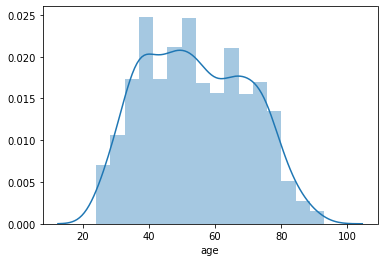

In [39]:
sns.distplot(df['age']);

In [40]:
## Age is mostly normally distributed

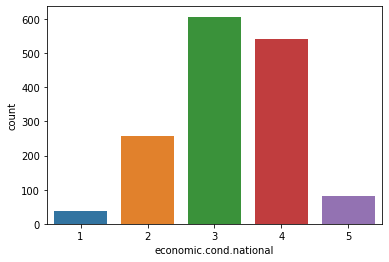

In [41]:
sns.countplot(df['economic.cond.national']);

In [42]:
## Majority of the voters fall into 3 and 4 of economic condition national

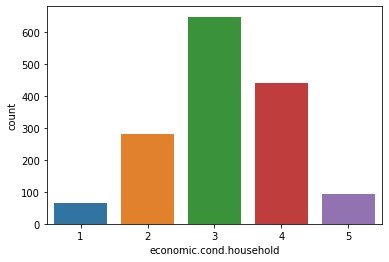

In [43]:
sns.countplot(df['economic.cond.household']);

In [44]:
## Majority of the voters fall into 3 and 4 of economic condition household

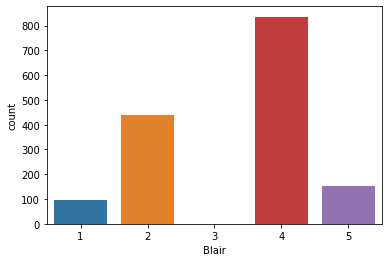

In [45]:
sns.countplot(df['Blair']);

In [46]:
## Labour leaders have a majority of vote as 4

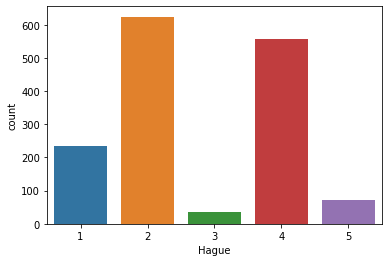

In [47]:
sns.countplot(df['Hague']);

In [48]:
## Conservative leaders have a majority of vote as 2

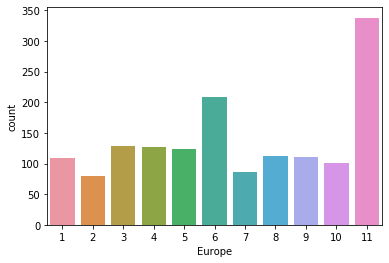

In [49]:
sns.countplot(df['Europe']);

In [50]:
## More no of people have strong Eurosceptic sentiment

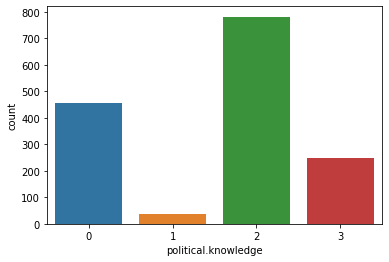

In [51]:
sns.countplot(df['political.knowledge']);

In [52]:
## Majority of the voters have good knowledge of european integration

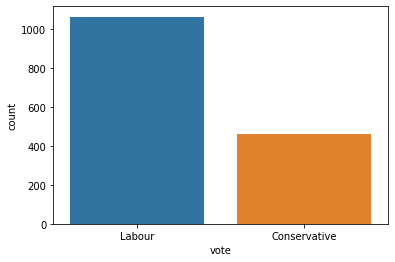

In [53]:
sns.countplot(df['vote']);

In [54]:
## The data is not balanced

#### Bivariate analysis

In [55]:
num_cols = ['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

AGE


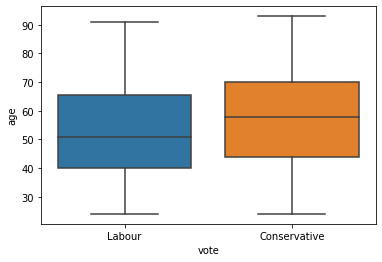

ECONOMIC.COND.NATIONAL


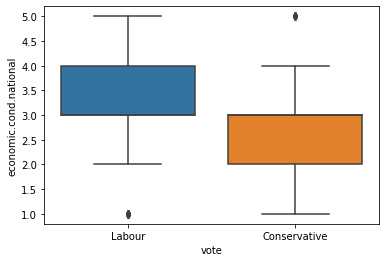

ECONOMIC.COND.HOUSEHOLD


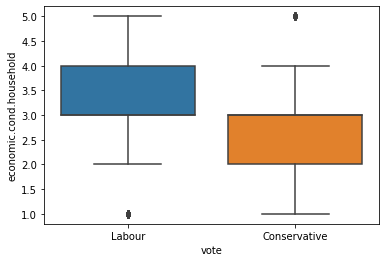

BLAIR


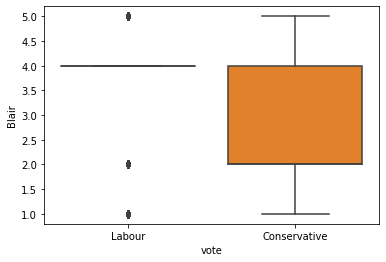

HAGUE


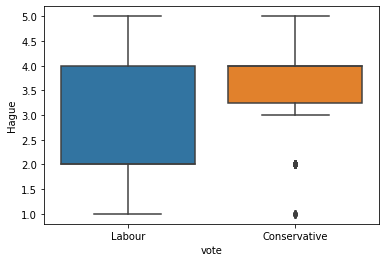

EUROPE


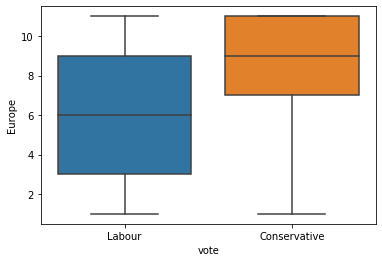

POLITICAL.KNOWLEDGE


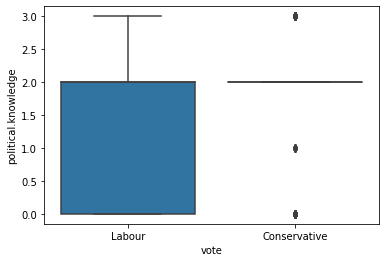

In [57]:
for col in num_cols:
    print(col.upper())
    sns.boxplot(x='vote', y=col, data=df, orient='v')
    plt.show()

In [58]:
## Age and Europe have no outliers other than that all other variables have outliers
## Age and Europe are mostly normally distribued for both labour and conservative party voters

There is no high correleanity between numerical the columns

## Encoding the data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.2+ KB


In [60]:
## Converting the values: Labour to 1 and Conservative to 0
df['vote'] = df['vote'].map({'Labour': 1, 'Conservative': 0})

In [61]:
## Removing the column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [62]:
## Splitting the data into X and Y
X = df.drop('vote', axis=1)
Y = df.vote

In [63]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,female
1,36,4,4,4,4,5,2,male
2,35,4,4,5,2,3,2,male
3,24,4,2,2,1,4,0,female
4,41,2,2,1,1,6,2,male


In [64]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int64

In [65]:
X = pd.get_dummies(X, drop_first=True)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender_male                1525 non-null uint8
dtypes: int64(7), uint8(1)
memory usage: 85.0 KB


In [67]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


### Scaling is necessary here as columns are on different scale and we will apply different models and some models get benefited from scaling

In [68]:
## Splitting the data into train and test
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

#### Scaling the data

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
ss = StandardScaler()

In [72]:
X_train.loc[:, num_cols] = ss.fit_transform(X_train.loc[:, num_cols])
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1493,-1.266219,-0.275172,-2.306413,0.558590,-0.646129,-0.203865,0.431470,0
1431,-0.757323,-0.275172,0.928832,0.558590,0.991447,-1.122980,0.431470,0
235,-1.138995,0.849765,0.928832,0.558590,-0.646129,0.102507,0.431470,0
1078,0.642142,0.849765,-0.149583,-1.149191,-1.464917,-0.816608,0.431470,1
735,-1.075383,0.849765,0.928832,0.558590,-0.646129,-1.429352,1.357786,1


In [73]:
X_test.loc[:, num_cols] = ss.transform(X_test.loc[:, num_cols])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Applying SMOTE

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
sm = SMOTE(random_state =1)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)

## Applying models

#### Applying logistic regression model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [83]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [84]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

In [85]:
print('Train F1 score of logistic regression', f1_score(Y_train, lr_train_pred))
print('Test F1 score of logistic regression', f1_score(Y_test, lr_test_pred))

Train F1 score of logistic regression 0.881201044386423
Test F1 score of logistic regression 0.8939393939393939


In [86]:
print('Train accuracy score of logistic regression', accuracy_score(Y_train, lr_train_pred))
print('Test accuracy score of logistic regression', accuracy_score(Y_test, lr_test_pred))

Train accuracy score of logistic regression 0.8294283036551078
Test accuracy score of logistic regression 0.8471615720524017


In [87]:
print(confusion_matrix(Y_test, lr_test_pred))

[[ 93  46]
 [ 24 295]]


In [88]:
print(classification_report(Y_test, lr_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       139
           1       0.87      0.92      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.84      0.85      0.84       458



In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.797


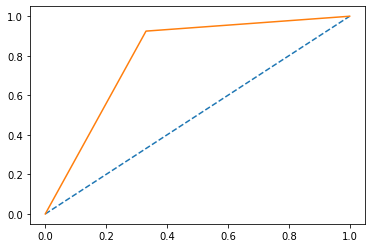

In [90]:
# calculate AUC
logreg_test_auc = roc_auc_score(Y_test, lr_test_pred)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
logreg_test_fpr, logreg_test_tpr, cart_train_thresholds = roc_curve(Y_test, lr_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_test_fpr, logreg_test_tpr)

#### Applying SMOTE on logistic regression model

In [91]:
lrsmote = LogisticRegression()
lrsmote.fit(X_train_sm, Y_train_sm)

LogisticRegression()

In [92]:
lr_train_pred_smote = lrsmote.predict(X_train)
lr_test_pred_smote = lrsmote.predict(X_test)

In [93]:
print('Train F1 score of logistic regression', f1_score(Y_train, lr_train_pred_smote))
print('Test F1 score of logistic regression', f1_score(Y_test, lr_test_pred_smote))

Train F1 score of logistic regression 0.8597733711048159
Test F1 score of logistic regression 0.8679867986798679


In [94]:
print('Train accuracy score of logistic regression', accuracy_score(Y_train, lr_train_pred_smote))
print('Test accuracy score of logistic regression', accuracy_score(Y_test, lr_test_pred_smote))

Train accuracy score of logistic regression 0.8144329896907216
Test accuracy score of logistic regression 0.8253275109170306


In [95]:
print(confusion_matrix(Y_test, lr_test_pred_smote))

[[115  24]
 [ 56 263]]


In [96]:
print(classification_report(Y_test, lr_test_pred_smote))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       139
           1       0.92      0.82      0.87       319

    accuracy                           0.83       458
   macro avg       0.79      0.83      0.80       458
weighted avg       0.84      0.83      0.83       458



AUC: 0.826


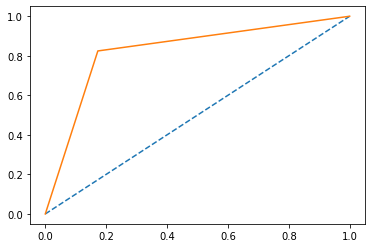

In [97]:
# calculate AUC
logregsm_test_auc = roc_auc_score(Y_test, lr_test_pred_smote)
print('AUC: %.3f' % logregsm_test_auc)
# calculate roc curve
logregsm_test_fpr, logregsm_test_tpr, cart_train_thresholds = roc_curve(Y_test, lr_test_pred_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logregsm_test_fpr, logregsm_test_tpr)

#### Applying LDA model

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [99]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [100]:
lda_train_pred = lda.predict(X_train)
lda_test_pred = lda.predict(X_test)

In [101]:
print('Train F1 score of LDA', f1_score(Y_train, lda_train_pred))
print('Test F1 score of LDA', f1_score(Y_test, lda_test_pred))

Train F1 score of LDA 0.8774703557312252
Test F1 score of LDA 0.8909370199692781


In [102]:
print('Train accuracy score of LDA', accuracy_score(Y_train, lda_train_pred))
print('Test accuracy score of LDA', accuracy_score(Y_test, lda_test_pred))

Train accuracy score of LDA 0.8256794751640113
Test accuracy score of LDA 0.8449781659388647


In [103]:
print(confusion_matrix(Y_test, lda_test_pred))

[[ 97  42]
 [ 29 290]]


In [104]:
print(classification_report(Y_test, lda_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.803


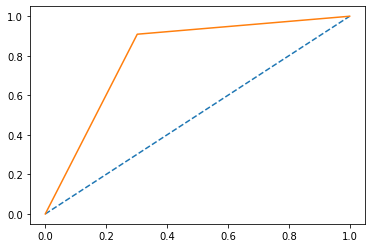

In [105]:
# calculate AUC
lda_test_auc = roc_auc_score(Y_test, lda_test_pred)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, cart_train_thresholds = roc_curve(Y_test, lda_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

#### Applying SMOTE on LDA model

In [106]:
ldasmote = LinearDiscriminantAnalysis()
ldasmote.fit(X_train_sm, Y_train_sm)

LinearDiscriminantAnalysis()

In [107]:
lda_train_pred_smote = ldasmote.predict(X_train)
lda_test_pred_smote = ldasmote.predict(X_test)

In [108]:
print('Train F1 score of LDA after smote', f1_score(Y_train, lda_train_pred_smote))
print('Test F1 score of LDA after smote', f1_score(Y_test, lda_test_pred_smote))

Train F1 score of LDA after smote 0.8532763532763532
Test F1 score of LDA after smote 0.8646864686468646


In [109]:
print('Train accuracy score of LDA after smote', accuracy_score(Y_train, lda_train_pred_smote))
print('Test accuracy score of LDA after smote', accuracy_score(Y_test, lda_test_pred_smote))

Train accuracy score of LDA after smote 0.8069353327085286
Test accuracy score of LDA after smote 0.8209606986899564


In [110]:
print(confusion_matrix(Y_test, lda_test_pred_smote))

[[114  25]
 [ 57 262]]


In [111]:
print(classification_report(Y_test, lda_test_pred_smote))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       139
           1       0.91      0.82      0.86       319

    accuracy                           0.82       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.82      0.83       458



AUC: 0.821


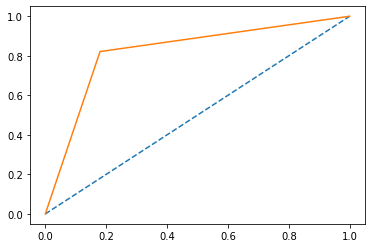

In [112]:
# calculate AUC
ldasm_test_auc = roc_auc_score(Y_test, lda_test_pred_smote)
print('AUC: %.3f' % ldasm_test_auc)
# calculate roc curve
ldasm_test_fpr, ldasm_test_tpr, cart_train_thresholds = roc_curve(Y_test, lda_test_pred_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldasm_test_fpr, ldasm_test_tpr)

#### Applying KNN model

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [115]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

In [116]:
print('Train F1 score of KNN model:', f1_score(Y_train, knn_train_pred))
print('Test F1 score of KNN model:', f1_score(Y_test, knn_test_pred))

Train F1 score of KNN model: 0.9023255813953487
Test F1 score of KNN model: 0.888888888888889


In [117]:
print('Train accuracy score of KNN model:', accuracy_score(Y_train, knn_train_pred))
print('Test accuracy score of KNN model:', accuracy_score(Y_test, knn_test_pred))

Train accuracy score of KNN model: 0.8622305529522024
Test accuracy score of KNN model: 0.8427947598253275


In [118]:
print(confusion_matrix(Y_test, knn_test_pred))

[[ 98  41]
 [ 31 288]]


In [119]:
print(classification_report(Y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       139
           1       0.88      0.90      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.804


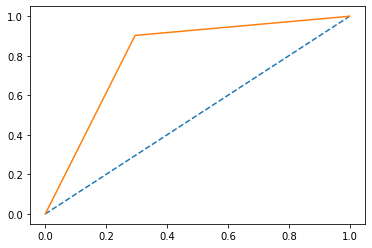

In [120]:
# calculate AUC
knn_test_auc = roc_auc_score(Y_test, knn_test_pred)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, cart_train_thresholds = roc_curve(Y_test, knn_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

#### Applying SMOTE on KNN model

In [121]:
knnsmote = LinearDiscriminantAnalysis()
knnsmote.fit(X_train_sm, Y_train_sm)

LinearDiscriminantAnalysis()

In [122]:
knn_train_pred_smote = knn.predict(X_train)
knn_test_pred_smote = knn.predict(X_test)

In [123]:
print('Train F1 score of KNN model:', f1_score(Y_train, knn_train_pred_smote))
print('Test F1 score of KNN model:', f1_score(Y_test, knn_test_pred_smote))

Train F1 score of KNN model: 0.9023255813953487
Test F1 score of KNN model: 0.888888888888889


In [124]:
print('Train accuracy score of KNN model:', accuracy_score(Y_train, knn_train_pred_smote))
print('Test accuracy score of KNN model:', accuracy_score(Y_test, knn_test_pred_smote))

Train accuracy score of KNN model: 0.8622305529522024
Test accuracy score of KNN model: 0.8427947598253275


In [125]:
print(confusion_matrix(Y_test, knn_test_pred_smote))

[[ 98  41]
 [ 31 288]]


In [126]:
print(classification_report(Y_test, knn_test_pred_smote))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       139
           1       0.88      0.90      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.804


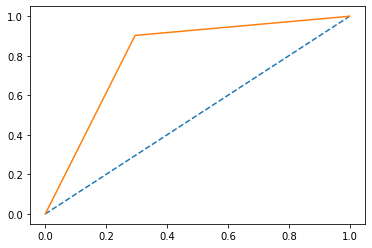

In [127]:
# calculate AUC
knnsm_test_auc = roc_auc_score(Y_test, knn_test_pred_smote)
print('AUC: %.3f' % knnsm_test_auc)
# calculate roc curve
knnsm_test_fpr, knnsm_test_tpr, cart_train_thresholds = roc_curve(Y_test, knn_test_pred_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knnsm_test_fpr, knnsm_test_tpr)

### Applying naive bayes model

In [128]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

### Applying gaussian naive bayes model

In [129]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [130]:
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

In [131]:
print('Train accuracy score of gaussian naive bayes:', gnb.score(X_train, Y_train))
print('Test accuracy score of gaussian naive bayes:', gnb.score(X_test, Y_test))

Train accuracy score of gaussian naive bayes: 0.8219306466729147
Test accuracy score of gaussian naive bayes: 0.8471615720524017


In [132]:
print(confusion_matrix(Y_test, gnb_test_pred))

[[101  38]
 [ 32 287]]


In [133]:
print(classification_report(Y_test, gnb_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



AUC: 0.813


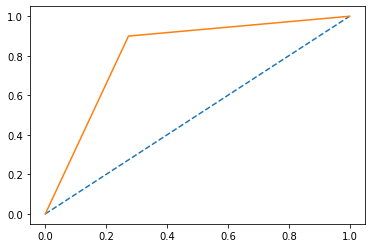

In [134]:
# calculate AUC
gnb_test_auc = roc_auc_score(Y_test, gnb_test_pred)
print('AUC: %.3f' % gnb_test_auc)
# calculate roc curve
gnb_test_fpr, gnb_test_tpr, cart_train_thresholds = roc_curve(Y_test, gnb_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnb_test_fpr, gnb_test_tpr)

### Applying gaussian naive bayes model on SMOTE data

In [135]:
gnbsmote = GaussianNB()
gnbsmote.fit(X_train_sm, Y_train_sm)

GaussianNB()

In [136]:
gnb_train_pred_smote = gnb.predict(X_train)
gnb_test_pred_smote = gnb.predict(X_test)

In [137]:
print('Train accuracy score of gaussian naive bayes:', gnbsmote.score(X_train, Y_train))
print('Test accuracy score of gaussian naive bayes:', gnbsmote.score(X_test, Y_test))

Train accuracy score of gaussian naive bayes: 0.8059981255857545
Test accuracy score of gaussian naive bayes: 0.8253275109170306


In [138]:
print(confusion_matrix(Y_test, gnb_test_pred_smote))

[[101  38]
 [ 32 287]]


In [139]:
print(classification_report(Y_test, gnb_test_pred_smote))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



AUC: 0.813


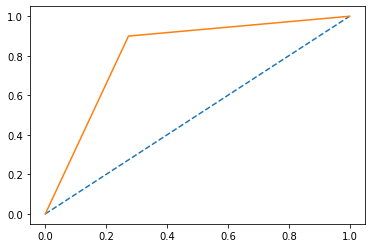

In [140]:
# calculate AUC
gnbsm_test_auc = roc_auc_score(Y_test, gnb_test_pred_smote)
print('AUC: %.3f' % gnbsm_test_auc)
# calculate roc curve
gnbsm_test_fpr, gnbsm_test_tpr, cart_train_thresholds = roc_curve(Y_test, gnb_test_pred_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gnbsm_test_fpr, gnbsm_test_tpr)

### Applying bernouli naive bayes model

In [141]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB()

In [142]:
bnb_train_pred = bnb.predict(X_train)
bnb_test_pred = bnb.predict(X_test)

In [143]:
print('Train accuracy score of bernouli naive bayes:', bnb.score(X_train, Y_train))
print('Test accuracy score of bernouli naive bayes:', bnb.score(X_test, Y_test))

Train accuracy score of bernouli naive bayes: 0.823805060918463
Test accuracy score of bernouli naive bayes: 0.8406113537117904


In [144]:
print(confusion_matrix(Y_test, bnb_test_pred))

[[102  37]
 [ 36 283]]


In [145]:
print(classification_report(Y_test, bnb_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       139
           1       0.88      0.89      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.81      0.81       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.810


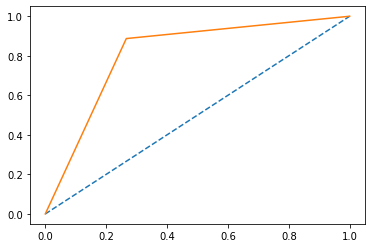

In [146]:
# calculate AUC
bnb_test_auc = roc_auc_score(Y_test, bnb_test_pred)
print('AUC: %.3f' % bnb_test_auc)
# calculate roc curve
bnb_test_fpr, bnb_test_tpr, cart_train_thresholds = roc_curve(Y_test, bnb_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bnb_test_fpr, bnb_test_tpr)

### Applying bernouli naive bayes model on SMOTE data

In [147]:
bnbsmote = BernoulliNB()
bnbsmote.fit(X_train_sm, Y_train_sm)

BernoulliNB()

In [148]:
bnb_train_pred_smote = bnbsmote.predict(X_train)
bnb_test_pred_smote = bnbsmote.predict(X_test)

In [149]:
print('Train accuracy score of bernouli naive bayes:', bnb.score(X_train, Y_train))
print('Test accuracy score of bernouli naive bayes:', bnb.score(X_test, Y_test))

Train accuracy score of bernouli naive bayes: 0.823805060918463
Test accuracy score of bernouli naive bayes: 0.8406113537117904


In [150]:
print(confusion_matrix(Y_test, bnb_test_pred_smote))

[[115  24]
 [ 61 258]]


In [151]:
print(classification_report(Y_test, bnb_test_pred_smote))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       139
           1       0.91      0.81      0.86       319

    accuracy                           0.81       458
   macro avg       0.78      0.82      0.79       458
weighted avg       0.84      0.81      0.82       458



AUC: 0.818


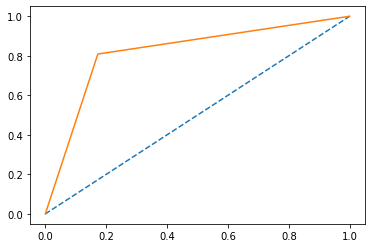

In [152]:
# calculate AUC
bnbsm_test_auc = roc_auc_score(Y_test, bnb_test_pred_smote)
print('AUC: %.3f' % bnbsm_test_auc)
# calculate roc curve
bnbsm_test_fpr, bnbsm_test_tpr, cart_train_thresholds = roc_curve(Y_test, bnb_test_pred_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bnbsm_test_fpr, bnbsm_test_tpr)

#### Applying bagging classifier using decision tree

In [153]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [154]:
be = DecisionTreeClassifier()

In [155]:
bag = BaggingClassifier(base_estimator=be, n_estimators=100, random_state=1)
bag.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [156]:
bag_train_pred = bag.predict(X_train)
bag_test_pred = bag.predict(X_test)

In [157]:
print('Train F1 score using bagging classifier: ', f1_score(Y_train, bag_train_pred))
print('Test F1 score using bagging classifier: ', f1_score(Y_test, bag_test_pred))

Train F1 score using bagging classifier:  0.9993284083277367
Test F1 score using bagging classifier:  0.8759571209800918


In [158]:
print('Train accuracy score using bagging classifier: ', accuracy_score(Y_train, bag_train_pred))
print('Test accuracy score using bagging classifier: ', accuracy_score(Y_test, bag_test_pred))

Train accuracy score using bagging classifier:  0.9990627928772259
Test accuracy score using bagging classifier:  0.8231441048034934


In [159]:
print(confusion_matrix(Y_test, bag_test_pred))

[[ 91  48]
 [ 33 286]]


In [160]:
print(classification_report(Y_test, bag_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       139
           1       0.86      0.90      0.88       319

    accuracy                           0.82       458
   macro avg       0.80      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.776


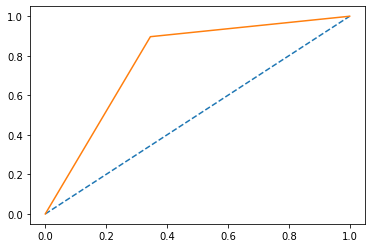

In [161]:
# calculate AUC
bag_test_auc = roc_auc_score(Y_test, bag_test_pred)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, cart_train_thresholds = roc_curve(Y_test, bag_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

#### Model tuning using gridsearch CV

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [163]:
param_grid = {
    'max_depth': [10,13,17],
    'max_features': [6,8,10],
    'min_samples_leaf': [50,70,90],
    'min_samples_split': [150, 200,250],
    'n_estimators': [200,300,500]
}

In [164]:
rfcl = RandomForestClassifier(random_state=1)

In [165]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=-1)

In [166]:
grid_search.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.79008018 0.78914385 0.79383341 0.78634278 0.78914121 0.79196075
 0.78352324 0.78352324 0.78352324 0.79008018 0.79008018 0.79664768
 0.78914121 0.79101915 0.79101915 0.78352324 0.78352324 0.78445957
 0.79384133 0.79477765 0.79946194 0.78914121 0.78914121 0.78914121
 0.78352324 0.78352324 0.78445957 0.79383605 0.79195812 0.79383605
 0.75629319 0.75629319 0.75629319 0.74786622 0.74786622 0.74880255
 0.79195812 0.79383605 0.79195812 0.75629319 0.75629319 0.75629319
 0.74786622 0.74786622 0.74880255 0.79194493 0.79288653 0.78539062
 0.76378383 0.76191117 0.76191117 0.74786622 0.74786622 0.74880255
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 13, 17], 'max_features': [6, 8, 10],
                         'min_samples_leaf': [50, 70, 90],
                         'min_samples_split': [150, 200, 250],
                         'n_estimators': [200, 300, 500]})

In [167]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 90,
 'min_samples_split': 150,
 'n_estimators': 500}

### Bagging using hyperparameters

In [168]:
behp = DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_leaf=90, min_samples_split=150)

In [169]:
baghp = BaggingClassifier(base_estimator=behp, n_estimators=500, random_state=1)
baghp.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        max_features=6,
                                                        min_samples_leaf=90,
                                                        min_samples_split=150),
                  n_estimators=500, random_state=1)

In [170]:
baghp_train_pred = baghp.predict(X_train)
baghp_test_pred = baghp.predict(X_test)

In [171]:
print('Train F1 score using bagging classifier: ', f1_score(Y_train, baghp_train_pred))
print('Test F1 score using bagging classifier: ', f1_score(Y_test, baghp_test_pred))

Train F1 score using bagging classifier:  0.870712401055409
Test F1 score using bagging classifier:  0.879154078549849


In [172]:
print('Train accuracy score using bagging classifier: ', accuracy_score(Y_train, baghp_train_pred))
print('Test accuracy score using bagging classifier: ', accuracy_score(Y_test, baghp_test_pred))

Train accuracy score using bagging classifier:  0.8163074039362699
Test accuracy score using bagging classifier:  0.8253275109170306


In [173]:
print(confusion_matrix(Y_test, baghp_test_pred))

[[ 87  52]
 [ 28 291]]


In [174]:
print(classification_report(Y_test, baghp_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       139
           1       0.85      0.91      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



AUC: 0.769


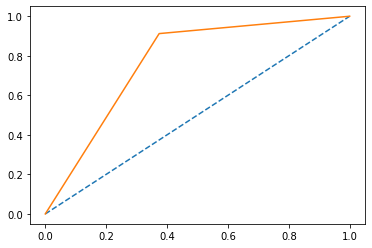

In [175]:
# calculate AUC
baghp_test_auc = roc_auc_score(Y_test, baghp_test_pred)
print('AUC: %.3f' % baghp_test_auc)
# calculate roc curve
baghp_test_fpr, baghp_test_tpr, cart_train_thresholds = roc_curve(Y_test, baghp_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(baghp_test_fpr, baghp_test_tpr)

### Random forest using best parameters

In [176]:
rfbp = RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=90, min_samples_split=150, n_estimators=500)
rfbp.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=90,
                       min_samples_split=150, n_estimators=500)

In [177]:
rfbp_train_pred = rfbp.predict(X_train)
rfbp_test_pred = rfbp.predict(X_test)

In [178]:
print('Train F1 score of logistic regression', f1_score(Y_train, rfbp_train_pred))
print('Test F1 score of logistic regression', f1_score(Y_test, rfbp_test_pred))

Train F1 score of logistic regression 0.868505452212957
Test F1 score of logistic regression 0.877037037037037


In [179]:
print('Train accuracy score of logistic regression', accuracy_score(Y_train, rfbp_train_pred))
print('Test accuracy score of logistic regression', accuracy_score(Y_test, rfbp_test_pred))

Train accuracy score of logistic regression 0.8078725398313027
Test accuracy score of logistic regression 0.8187772925764192


In [180]:
print(confusion_matrix(Y_test, rfbp_test_pred))

[[ 79  60]
 [ 23 296]]


In [181]:
print(classification_report(Y_test, rfbp_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66       139
           1       0.83      0.93      0.88       319

    accuracy                           0.82       458
   macro avg       0.80      0.75      0.77       458
weighted avg       0.81      0.82      0.81       458



AUC: 0.748


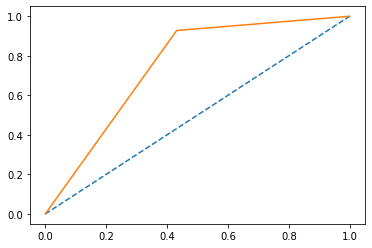

In [182]:
# calculate AUC
rfbp_test_auc = roc_auc_score(Y_test, rfbp_test_pred)
print('AUC: %.3f' % rfbp_test_auc)
# calculate roc curve
rfbp_test_fpr, rfbp_test_tpr, cart_train_thresholds = roc_curve(Y_test, rfbp_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfbp_test_fpr, rfbp_test_tpr)

#### Applying adaboost model

In [183]:
from sklearn.ensemble import AdaBoostClassifier

In [184]:
abe = DecisionTreeClassifier(max_depth=1)

In [185]:
ada = AdaBoostClassifier(base_estimator=abe, n_estimators=100, random_state=1, learning_rate=0.1)
ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [186]:
ada_train_pred = ada.predict(X_train)
ada_test_pred = ada.predict(X_test)

In [187]:
print('Train F1 score of adaboost: ', f1_score(Y_train, ada_train_pred))
print('Test F1 score of adaboost: ', f1_score(Y_test, ada_test_pred))

Train F1 score of adaboost:  0.8819308545335942
Test F1 score of adaboost:  0.8902255639097745


In [188]:
print('Train accuracy score of adaboost: ', accuracy_score(Y_train, ada_train_pred))
print('Test accuracy score of adaboost: ', accuracy_score(Y_test, ada_test_pred))

Train accuracy score of adaboost:  0.8303655107778819
Test accuracy score of adaboost:  0.8406113537117904


In [189]:
print(confusion_matrix(Y_test, ada_test_pred))

[[ 89  50]
 [ 23 296]]


In [190]:
print(classification_report(Y_test, ada_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       139
           1       0.86      0.93      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.78      0.80       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.784


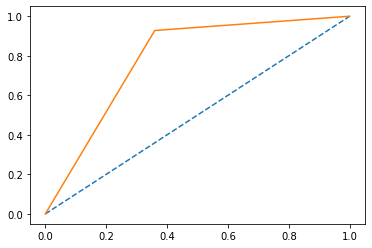

In [191]:
# calculate AUC
ada_test_auc = roc_auc_score(Y_test, ada_test_pred)
print('AUC: %.3f' % ada_test_auc)
# calculate roc curve
ada_test_fpr, ada_test_tpr, cart_train_thresholds = roc_curve(Y_test, ada_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_test_fpr, ada_test_tpr)

### Hyperparameter tuning using adaboost

In [192]:
grid = dict()
grid['n_estimators'] = [100,200,300,500]
grid['learning_rate'] = [0.05, 0.10, 0.15, 0.20]
adamodel = AdaBoostClassifier()

In [193]:
grid_search = GridSearchCV(estimator=adamodel, param_grid=grid, n_jobs=-1, cv=3)

In [194]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 300, 500]})

In [195]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

### Adaboost using hyperparameters

In [196]:
abehp = DecisionTreeClassifier(max_depth=1)

In [197]:
abehp = AdaBoostClassifier(base_estimator=abe, n_estimators=300, random_state=1, learning_rate=0.1)
abehp.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=300, random_state=1)

In [198]:
abehp_train_pred = ada.predict(X_train)
abehp_test_pred = ada.predict(X_test)

In [199]:
print('Train F1 score of adaboost: ', f1_score(Y_train, abehp_train_pred))
print('Test F1 score of adaboost: ', f1_score(Y_test, abehp_test_pred))

Train F1 score of adaboost:  0.8819308545335942
Test F1 score of adaboost:  0.8902255639097745


In [200]:
print('Train accuracy score of adaboost: ', accuracy_score(Y_train, abehp_train_pred))
print('Test accuracy score of adaboost: ', accuracy_score(Y_test, abehp_test_pred))

Train accuracy score of adaboost:  0.8303655107778819
Test accuracy score of adaboost:  0.8406113537117904


In [201]:
print(confusion_matrix(Y_test, abehp_test_pred))

[[ 89  50]
 [ 23 296]]


In [202]:
print(classification_report(Y_test, abehp_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       139
           1       0.86      0.93      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.78      0.80       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.784


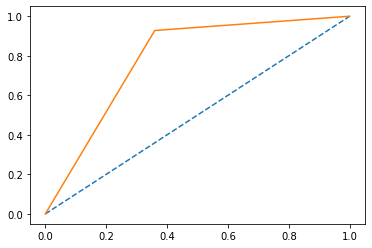

In [203]:
# calculate AUC
abehp_test_auc = roc_auc_score(Y_test, abehp_test_pred)
print('AUC: %.3f' % abehp_test_auc)
# calculate roc curve
abehp_test_fpr, abehp_test_tpr, cart_train_thresholds = roc_curve(Y_test, abehp_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(abehp_test_fpr, abehp_test_tpr)

#### Applying gradient boosting model

In [204]:
from sklearn.ensemble import GradientBoostingClassifier

In [205]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [206]:
gbc_train_pred = gbc.predict(X_train)
gbc_test_pred = gbc.predict(X_test)

In [207]:
print('Train F1 score of gradient boosting: ', f1_score(Y_train, gbc_train_pred))
print('Test F1 score of gradient boosting: ', f1_score(Y_test, gbc_test_pred))

Train F1 score of gradient boosting:  0.9211563731931669
Test F1 score of gradient boosting:  0.8858447488584476


In [208]:
print('Train accuracy score of gradient boosting: ', accuracy_score(Y_train, gbc_train_pred))
print('Test accuracy score of gradient boosting: ', accuracy_score(Y_test, gbc_test_pred))

Train accuracy score of gradient boosting:  0.887535145267104
Test accuracy score of gradient boosting:  0.8362445414847162


In [209]:
print(confusion_matrix(Y_test, gbc_test_pred))

[[ 92  47]
 [ 28 291]]


In [210]:
print(classification_report(Y_test, gbc_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



AUC: 0.784


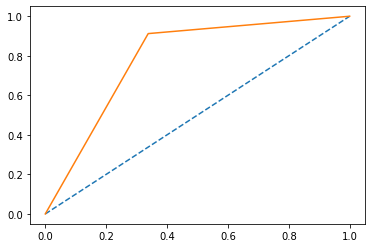

In [211]:
# calculate AUC
gbc_test_auc = roc_auc_score(Y_test, gbc_test_pred)
print('AUC: %.3f' % abehp_test_auc)
# calculate roc curve
gbc_test_fpr, gbc_test_tpr, cart_train_thresholds = roc_curve(Y_test, gbc_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbc_test_fpr, gbc_test_tpr)

### Hyperparameter tuning using gradient boosting

In [212]:
gbch = GradientBoostingClassifier(random_state=1)

In [213]:
param_grid = {
    'learning_rate': [0.05,0.10,0.15,0.20],
    'max_depth': [8,10,15,20],
    'min_samples_leaf': [50,70,90,150],
    'min_samples_split': [150, 200,250,400],
    'n_estimators': [200,300,500,800]
}

In [214]:
grid_search = GridSearchCV(estimator = gbch, param_grid = param_grid, cv = 3,n_jobs=-1)

In [215]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [8, 10, 15, 20],
                         'min_samples_leaf': [50, 70, 90, 150],
                         'min_samples_split': [150, 200, 250, 400],
                         'n_estimators': [200, 300, 500, 800]})

In [216]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 400,
 'n_estimators': 200}

### Gradient boosting using hyperparameters

In [217]:
gbchp = GradientBoostingClassifier(n_estimators=200, random_state=1, min_samples_split=400, min_samples_leaf=50, max_depth=8, learning_rate=0.05)
gbchp.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, min_samples_leaf=50,
                           min_samples_split=400, n_estimators=200,
                           random_state=1)

In [218]:
gbchp_train_pred = gbc.predict(X_train)
gbchp_test_pred = gbc.predict(X_test)

In [219]:
print('Train F1 score of gradient boosting: ', f1_score(Y_train, gbchp_train_pred))
print('Test F1 score of gradient boosting: ', f1_score(Y_test, gbchp_test_pred))

Train F1 score of gradient boosting:  0.9211563731931669
Test F1 score of gradient boosting:  0.8858447488584476


In [220]:
print('Train accuracy score of gradient boosting: ', accuracy_score(Y_train, gbchp_train_pred))
print('Test accuracy score of gradient boosting: ', accuracy_score(Y_test, gbchp_test_pred))

Train accuracy score of gradient boosting:  0.887535145267104
Test accuracy score of gradient boosting:  0.8362445414847162


In [224]:
print(confusion_matrix(Y_test, gbchp_test_pred))

[[ 92  47]
 [ 28 291]]


In [225]:
print(classification_report(Y_test, gbchp_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



AUC: 0.787


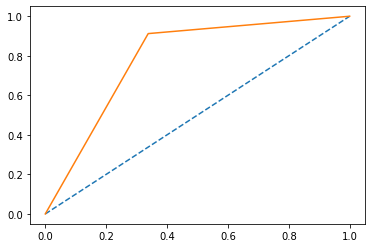

In [227]:
# calculate AUC
gbchp_test_auc = roc_auc_score(Y_test, gbchp_test_pred)
print('AUC: %.3f' % gbchp_test_auc)
# calculate roc curve
gbchp_test_fpr, gbchp_test_tpr, cart_train_thresholds = roc_curve(Y_test, gbchp_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbchp_test_fpr, gbchp_test_tpr)

In [581]:
## Based on the above models, KNN is the best model. As it has low bias, low variance and goood f1-score and accuracy score on
## test data.